In [93]:
import numpy as np 
import pandas as pd 

In [94]:
from tensorflow import keras #I used tensorflow for the DNN part ,Though i am still going through tensor flow tutotial,i used youtube and stack overflow to write the code and understand the commands and function to use
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [95]:
train = pd.read_csv('/content/train.csv') 
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
train.shape

(42000, 785)

In [97]:
# train.isnull().sum().sum()

In [98]:
from sklearn.model_selection import train_test_split


In [99]:
y_train = train[['label']] 
X_train = train.drop('label',axis=1)
X_train.shape  

(42000, 784)

In [100]:
X_train = X_train/255.0

In [101]:
y_train.shape

(42000, 1)

In [102]:
y_train = to_categorical(y_train, num_classes=10)

In [103]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8) #data split ,can take any though

In [105]:
y_train.shape

(33600, 10)

In [106]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[784]),#first layer with 512 unit and activation function relu(rectified linear activation unit)
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(units=256, activation='relu'),#activation function for next layer with updating unit
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(units=128, activation='relu'),#activation function for next layer
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(units=10, activation='softmax')#for the output
])

In [107]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
) #compiling the lib

In [108]:
history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_val,y_val),
                    batch_size=128,
                    epochs=20
    ) #defining our operation

Epoch 1/20
263/263 [==============================] - 7s 21ms/step - loss: 0.4034 - accuracy: 0.8766 - val_loss: 0.2104 - val_accuracy: 0.9389
Epoch 2/20
263/263 [==============================] - 7s 25ms/step - loss: 0.1789 - accuracy: 0.9446 - val_loss: 0.1287 - val_accuracy: 0.9613
Epoch 3/20
263/263 [==============================] - 6s 24ms/step - loss: 0.1358 - accuracy: 0.9576 - val_loss: 0.1103 - val_accuracy: 0.9667
Epoch 4/20
263/263 [==============================] - 5s 18ms/step - loss: 0.1191 - accuracy: 0.9624 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 5/20
263/263 [==============================] - 5s 18ms/step - loss: 0.0961 - accuracy: 0.9684 - val_loss: 0.0942 - val_accuracy: 0.9721
Epoch 6/20
263/263 [==============================] - 6s 24ms/step - loss: 0.0847 - accuracy: 0.9721 - val_loss: 0.0948 - val_accuracy: 0.9710
Epoch 7/20
263/263 [==============================] - 6s 23ms/step - loss: 0.0742 - accuracy: 0.9760 - val_loss: 0.0903 - val_accuracy: 0.9744

In [109]:
# accuracy = model.evaluate(x, y)
# print("Model accuracy: %.2f"% (accuracy*100)

In [110]:
history_df = pd.DataFrame(history.history) #data analysis of our operation
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.403401,0.876607,0.210371,0.938929
1,0.178862,0.944613,0.128654,0.961310
2,0.135805,0.957589,0.110257,0.966667
3,0.119055,0.962381,0.097061,0.970000
4,0.096107,0.968363,0.094187,0.972143


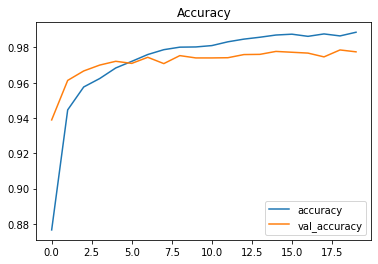

In [119]:
#for accuracy graph
history_df[['accuracy','val_accuracy']].plot(title='Accuracy')

In [112]:
test = pd.read_csv('/content/test.csv')
test.shape

(28000, 784)

In [113]:
test = test/255.0 #resizing 

In [114]:
results = model.predict(test) # Predict on the test set

results = np.argmax(results,axis = 1) # Select result with Maximum probability

results = pd.Series(results,name="Label")

In [115]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [116]:
# predictions = model.predict(X_test)

In [117]:
# correct_predictions = np.nonzero(predictions == y_test)[0]
# incorrect_predictions = np.nonzero(predictions != y_test)[0]

In [118]:
# print(len(correct_predictions)," classified correctly")
# print(len(incorrect_predictions)," classified incorrectly")